# **GRIP : The Sparks Foundation**

**R JAYSHREE**

**TASK 1: PREDICTION USING SUPERVISED ML**

**SIMPLE LINEAR REGRESSION**

**In this regression task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.**


In [1]:
#import libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import sklearn as linear_model
%matplotlib inline

In [7]:
#importing dataset
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("Data imported successfully")
data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
data.shape

(25, 2)

In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


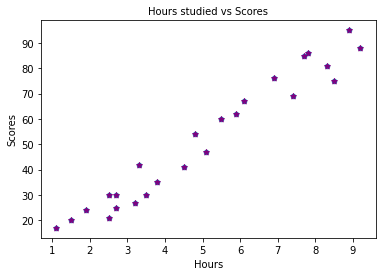

In [20]:
#plotting the scattered plot
data.plot(kind='scatter',x='Hours',y='Scores')
plt.title('Hours studied vs Scores',fontsize=10)
plt.scatter(data.Hours,data.Scores,color='purple',marker='*')
plt.show()

**From the graph above, it is clearly seen that there is a positive linear relation between the number of hours studied and percentage of score.**

In [22]:
#correlation coefficients
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**LINEAR REGRESSION**

In [24]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values

**Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method.**

In [27]:
#Preparing the data and separating them as train and tests
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=50)

In [26]:

#TRAINING THE MODELS
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
print("B0 =",linreg.intercept_,"\nB1 =",linreg.coef_)
Y0 = linreg.intercept_ + linreg.coef_*X_train

B0 = 2.810236462826552 
B1 = [9.59563563]


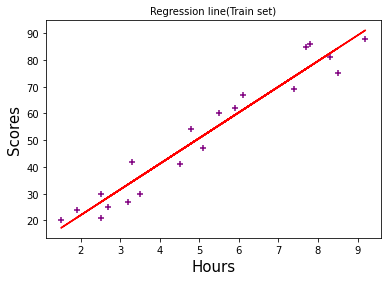

In [30]:
# plotting on train data
plt.scatter(X_train,Y_train,color='purple',marker='+')
plt.plot(X_train,Y0,color='red')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

In [31]:
# predicting the Scores for test data
Y_pred=linreg.predict(X_test)
print(Y_pred)

[88.21139357 28.71845267 69.02012231 39.27365186 13.36543566]


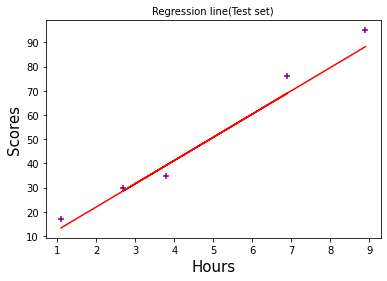

In [34]:
# plotting line on test data
plt.plot(X_test,Y_pred,color='red')
plt.scatter(X_test,Y_test,color='purple',marker='+')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=10)
plt.show()

**COMPARING ACTUAL AND PREDICTED DATA**

In [35]:
Y_test1 = list(Y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
df_compare

,Actual,Result
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


**ACCURACY OF THE MODEL**

In [36]:
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)

0.971014141329942

**PREDICTING THE ERROR**

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [38]:
MSE = metrics.mean_squared_error(Y_test,Y_pred)
root_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  25.584078296539932
Root Mean Squared Error =  5.058070610078504
Mean Absolute Error     =  5.058070610078504


**PREDICTING THE SCORE**

In [39]:
Prediction_score = linreg.predict([[9.25]])
print("Predicted score for a student studying for 9.25 hours :",Prediction_score)

Predicted score for a student studying for 9.25 hours : [91.56986604]
